# Home Equity Line of Credit

For this project, we will analyze the "Home Equity Line of Credit" dataset with the ultimate goal of building a model which will predict which customers will pay back their loans or will not. 

### Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick #For specifying axes ticks
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()
from matplotlib.backends.backend_pdf import PdfPages

<Figure size 600x300 with 0 Axes>

In [3]:
pwd

'C:\\Users\\19713\\Desktop\\Springboard'

In [4]:
df = pd.read_csv('C:\\Users\\19713\\Desktop\\Springboard\\heloc_dataset_v1 (1).csv')
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [5]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [6]:
df.shape

(10459, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [8]:
df.isna().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [9]:
keys = []
for i in df.columns:
    keys.append(i)
keys.remove('RiskPerformance')    

In [10]:
values = ['consolidated indicator of risk markers (equivalent of polish BIK’s rate)',
         'number of months that have elapsed since first trade',
         'number of months that have elapsed since last opened trade',
         'average months in file',
         'number of satisfactory trades',
         'number of trades which are more than 60 past due',
         'number of trades which are more than 90 past due',
         'percent of trades, that were not delinquent',
         'number of months that have elapsed since last delinquent trade',
         'the longest delinquency period in last 12 months',
         'the longest delinquency period',
         'total number of trades',
         'number of trades opened in last 12 months',
         'percent of installments trades',
         'months since last inquiry (excluding last 7 days)',
         'number of inquiries in last 6 months',
         'number of inquiries in last 6 months (excluding last 7 days)',
         'revolving balance divided by credit limit',
         'installment balance divided by original loan amount',
         'number of revolving trades with balance',
         'number of installment trades with balance',
         'number of trades with high utilization ratio (credit utilization ratio - the amount of a credit card balance compared to the credit limit)',
         'percent of trades with balance']

Below we have a table describing the features/predictors from the dataset.

In [11]:
# table of feature and its description
key_value_pairs = zip(keys, values)
my_dict = dict(key_value_pairs)
headers = ['Feature', 'Description']

print(f'{headers[0]: <45}{headers[1]: <35}')
for key, value in my_dict.items():
    print(f'{key: <45}{value: <35}')

Feature                                      Description                        
ExternalRiskEstimate                         consolidated indicator of risk markers (equivalent of polish BIK’s rate)
MSinceOldestTradeOpen                        number of months that have elapsed since first trade
MSinceMostRecentTradeOpen                    number of months that have elapsed since last opened trade
AverageMInFile                               average months in file             
NumSatisfactoryTrades                        number of satisfactory trades      
NumTrades60Ever2DerogPubRec                  number of trades which are more than 60 past due
NumTrades90Ever2DerogPubRec                  number of trades which are more than 90 past due
PercentTradesNeverDelq                       percent of trades, that were not delinquent
MSinceMostRecentDelq                         number of months that have elapsed since last delinquent trade
MaxDelq2PublicRecLast12M                     the lon

In [12]:
my_dict['ExternalRiskEstimate']

'consolidated indicator of risk markers (equivalent of polish BIK’s rate)'

In [13]:
my_dict

{'ExternalRiskEstimate': 'consolidated indicator of risk markers (equivalent of polish BIK’s rate)',
 'MSinceOldestTradeOpen': 'number of months that have elapsed since first trade',
 'MSinceMostRecentTradeOpen': 'number of months that have elapsed since last opened trade',
 'AverageMInFile': 'average months in file',
 'NumSatisfactoryTrades': 'number of satisfactory trades',
 'NumTrades60Ever2DerogPubRec': 'number of trades which are more than 60 past due',
 'NumTrades90Ever2DerogPubRec': 'number of trades which are more than 90 past due',
 'PercentTradesNeverDelq': 'percent of trades, that were not delinquent',
 'MSinceMostRecentDelq': 'number of months that have elapsed since last delinquent trade',
 'MaxDelq2PublicRecLast12M': 'the longest delinquency period in last 12 months',
 'MaxDelqEver': 'the longest delinquency period',
 'NumTotalTrades': 'total number of trades',
 'NumTradesOpeninLast12M': 'number of trades opened in last 12 months',
 'PercentInstallTrades': 'percent of ins

### Exploratory Data Analysis

In [14]:
# converting 'RiskPeformance' column with numerical values
df_num = df.copy()
risk_performance_num = {"Bad": 0, "Good": 1}
df_num['RiskPerformance'].replace(risk_performance_num, inplace = True)
df_num.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [15]:
features = df_num.columns.drop('RiskPerformance')
keys = []
bins = []
for i in features:
    keys.append(i)

In [16]:
for i in features:
    x = np.arange(min(df[i])-1, max(df[i]) + 3, 3)
    bins.append(x)

In [17]:
cut_bins = dict(zip(keys, bins))

In [18]:
# binning all numerical features into bins of size 3
for column in features:
    df_num[column] = pd.cut(df_num[column], bins=cut_bins[column])

In [19]:
# to verify that every cell was placed into a bin
df_num.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [20]:
df_num.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,"(53, 56]","(143, 146]","(2, 5]","(83, 86]","(17, 20]","(2, 5]","(-1, 2]","(80, 83]","(-1, 2]",...,"(41, 44]","(-1, 2]","(-1, 2]","(-1, 2]","(32, 35]","(-10, -7]","(5, 8]","(-1, 2]","(-1, 2]","(68, 71]"
1,0,"(59, 62]","(56, 59]","(14, 17]","(38, 41]","(-1, 2]","(2, 5]","(2, 5]","(98, 101]","(-10, -7]",...,"(65, 68]","(-1, 2]","(-1, 2]","(-1, 2]","(-1, 2]","(-10, -7]","(-1, 2]","(-10, -7]","(-10, -7]","(-1, 2]"
2,0,"(65, 68]","(65, 68]","(2, 5]","(23, 26]","(8, 11]","(-1, 2]","(-1, 2]","(98, 101]","(-10, -7]",...,"(41, 44]","(-1, 2]","(2, 5]","(2, 5]","(50, 53]","(65, 68]","(2, 5]","(-1, 2]","(-1, 2]","(83, 86]"
3,0,"(65, 68]","(167, 170]","(-1, 2]","(71, 74]","(26, 29]","(-1, 2]","(-1, 2]","(92, 95]","(74, 77]",...,"(56, 59]","(-1, 2]","(2, 5]","(2, 5]","(71, 74]","(80, 83]","(5, 8]","(2, 5]","(2, 5]","(89, 92]"
4,0,"(80, 83]","(332, 335]","(26, 29]","(131, 134]","(11, 14]","(-1, 2]","(-1, 2]","(98, 101]","(-10, -7]",...,"(23, 26]","(-1, 2]","(-1, 2]","(-1, 2]","(50, 53]","(86, 89]","(2, 5]","(-1, 2]","(-1, 2]","(77, 80]"


In [21]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


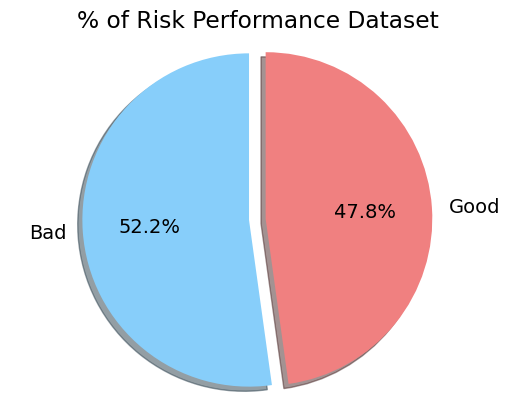

In [22]:
# pie graph of risk performance
sizes = df['RiskPerformance'].value_counts(sort = True)
labels = ['Bad', 'Good']
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0) #explode Churns

fig = plt.figure()
plt.pie(sizes, 
       labels = labels,
       colors = colors,
       explode = explode,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 90)
plt.axis('equal')
plt.title('% of Risk Performance Dataset')
plt.show()
fig.savefig('Risk_performance_pi-chart.pdf')

From the above pie chart we see that there is a slight majority of bad customers in comparison to good customers.

In [23]:
y = df['RiskPerformance']
X = df.drop('RiskPerformance', axis = 1)

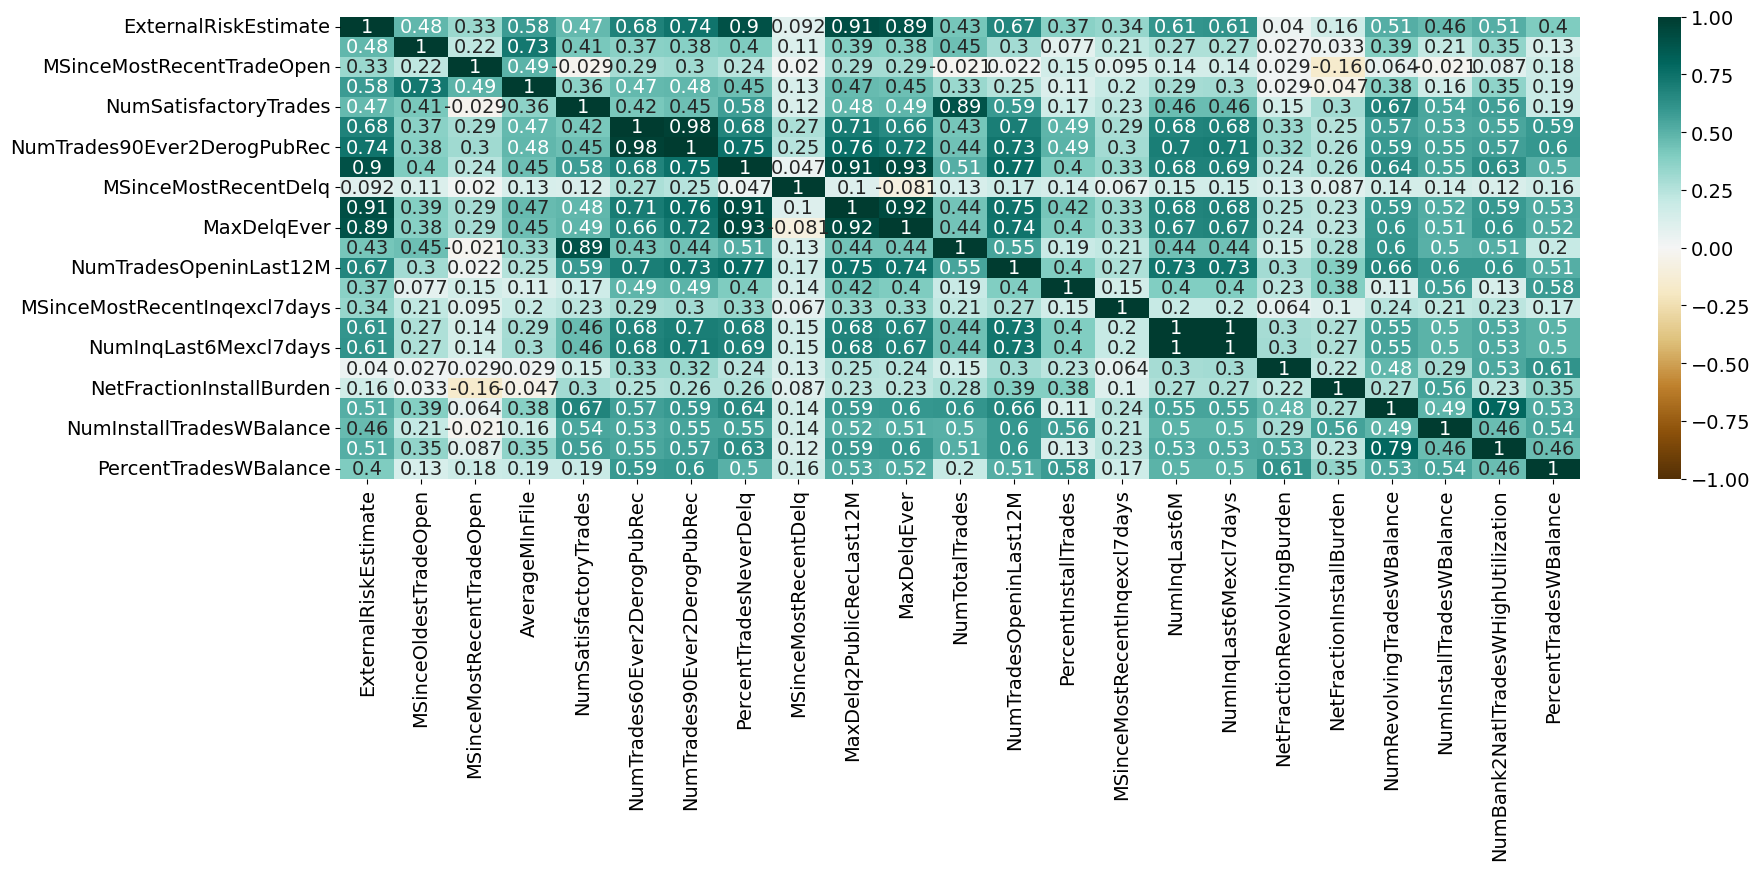

In [24]:
# heat map of correlation between features
plt.figure(figsize = (20,6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
plt.savefig('heatmap.png', dpi = 300, bbox_inches = 'tight')

In [25]:
# features with highest correlations
top_correlation = pd.DataFrame(df.corr().unstack().abs().sort_values(ascending = False).drop_duplicates())
top_correlation.loc[top_correlation[0] >= 0.5]

0
ExternalRiskEstimate        ExternalRiskEstimate                1.000000
NumInqLast6M                NumInqLast6Mexcl7days               0.996683
NumTrades60Ever2DerogPubRec NumTrades90Ever2DerogPubRec         0.975480
PercentTradesNeverDelq      MaxDelqEver                         0.928059
MaxDelq2PublicRecLast12M    MaxDelqEver                         0.924642
...                                                                  ...
NumTotalTrades              PercentTradesNeverDelq              0.512074
                            NumBank2NatlTradesWHighUtilization  0.510114
ExternalRiskEstimate        NumRevolvingTradesWBalance          0.508414
PercentTradesNeverDelq      PercentTradesWBalance               0.502780
NumTotalTrades              NumInstallTradesWBalance            0.501167

[88 rows x 1 columns]

If two variables have a correlation greater than or equal to the absolute value of 0.5, those variables are considered to be strongly correlated. From the above data frame we see that there are 88 pairs of variables which are strongly correlated with each other. We can see from the below regression plots how closely correlated some of these features are with each other. 

<AxesSubplot:xlabel='NumInqLast6M', ylabel='NumInqLast6Mexcl7days'>

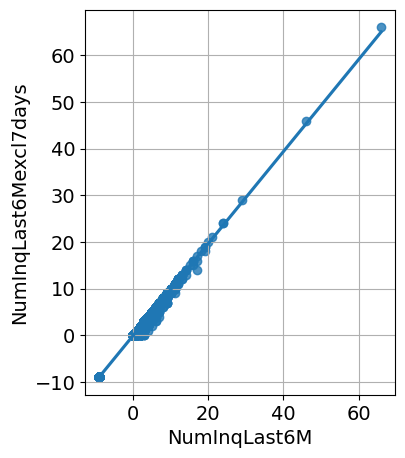

In [26]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'NumInqLast6M', y = 'NumInqLast6Mexcl7days', data = df)

In [27]:
print(my_dict['NumInqLast6M'])
print(my_dict['NumInqLast6Mexcl7days'])

number of inquiries in last 6 months
number of inquiries in last 6 months (excluding last 7 days)


<AxesSubplot:xlabel='NumTrades60Ever2DerogPubRec', ylabel='NumTrades90Ever2DerogPubRec'>

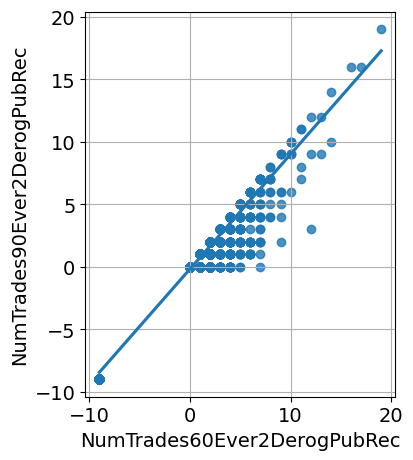

In [28]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'NumTrades60Ever2DerogPubRec', y = 'NumTrades90Ever2DerogPubRec', data = df)

In [29]:
print(my_dict['NumTrades60Ever2DerogPubRec'])
print(my_dict['NumTrades90Ever2DerogPubRec'])

number of trades which are more than 60 past due
number of trades which are more than 90 past due


<AxesSubplot:xlabel='PercentTradesNeverDelq', ylabel='MaxDelqEver'>

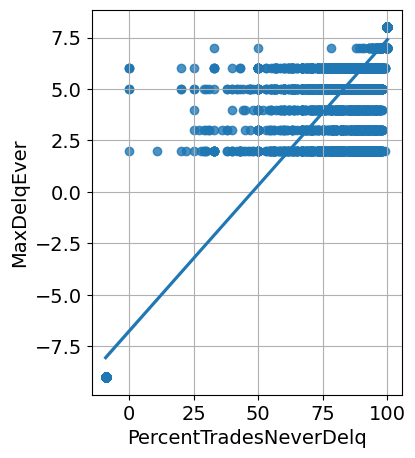

In [30]:
fig, ax = plt.subplots(figsize = (4,5))
sns.regplot(x = 'PercentTradesNeverDelq', y = 'MaxDelqEver', data = df)

In [31]:
print(my_dict['PercentTradesNeverDelq'])
print(my_dict['MaxDelqEver'])

percent of trades, that were not delinquent
the longest delinquency period


Printed after every regression plot are the descriptions of each feature. We see that for the highest correlated features that they are very closely related to each other. For example, the feature "NumInqLast6M" and "NumInqLast6Mexcl7days" have the descriptions "number of inquiries in last 6 months" and "number of inquiries in last 6 months (excluding last 7 days)" respectively. These two features have almost exactly the same data, and hence have almost a correlation of 1. We can also observe that the other highly correlated features are also very similarly related in their descriptions.

In [32]:
bad = df.loc[df['RiskPerformance'] == 'Bad'].drop('RiskPerformance', axis = 1)
good = df.loc[df['RiskPerformance'] == 'Good'].drop('RiskPerformance', axis = 1)

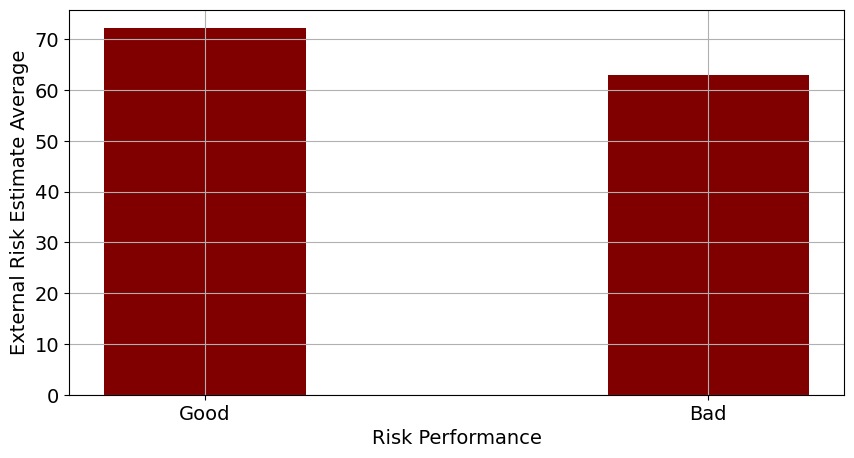

In [33]:
RiskPerformance = ['Good', 'Bad']
values = [good['ExternalRiskEstimate'].mean(), bad['ExternalRiskEstimate'].mean()]
fig = plt.figure(figsize = (10,5))
plt.bar(RiskPerformance, values, color = 'maroon', width = 0.4)
plt.xlabel("Risk Performance")
plt.ylabel("External Risk Estimate Average")
plt.show()

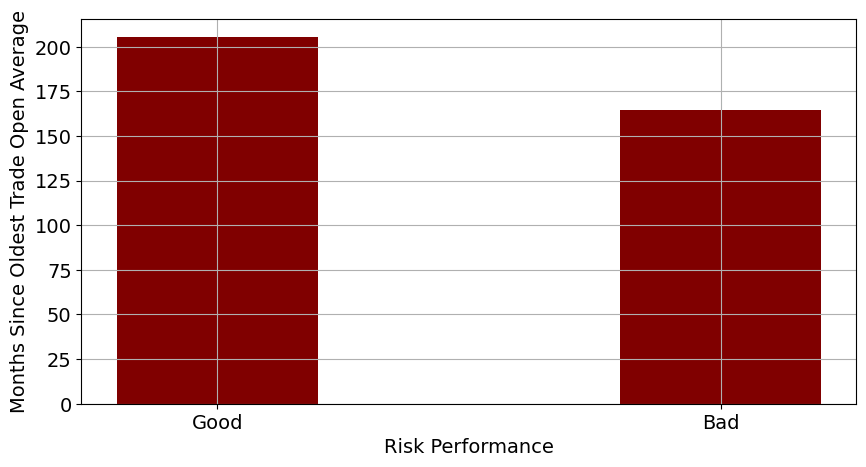

In [34]:
RiskPerformance = ['Good', 'Bad']
values = [good['MSinceOldestTradeOpen'].mean(), bad['MSinceOldestTradeOpen'].mean()]
fig = plt.figure(figsize = (10,5))
plt.bar(RiskPerformance, values, color = 'maroon', width = 0.4)
plt.xlabel("Risk Performance")
plt.ylabel("Months Since Oldest Trade Open Average")
plt.show()

From this bar plot we see that there seems to be a significant difference between the "External Risk Estimate" and "Months since oldest trade open" averages for good customers and bad customers. For every feature we can conduct an independent t-test to determine if there is a significant difference in their averages partitioned by whether the customer has a good or bad risk performance. 

In [35]:
# t-test for difference in means between good and bad risk performance
from scipy.stats import ttest_ind
values_2 = []
for i in bad.columns:
    values_2.append(ttest_ind(bad[i], good[i])[1])
key_value_pair_2 = zip(bad.columns, values_2)
p_value_dict = dict(key_value_pair_2)
for key, value in p_value_dict.items():
    print(f'The p-value for {key} is {value}.')

The p-value for ExternalRiskEstimate is 1.855490136390626e-111.
The p-value for MSinceOldestTradeOpen is 2.5840031264207896e-81.
The p-value for MSinceMostRecentTradeOpen is 1.5684489583568152e-06.
The p-value for AverageMInFile is 9.665039496270297e-104.
The p-value for NumSatisfactoryTrades is 1.373575552141484e-36.
The p-value for NumTrades60Ever2DerogPubRec is 5.9623224316202e-12.
The p-value for NumTrades90Ever2DerogPubRec is 8.986761101135063e-06.
The p-value for PercentTradesNeverDelq is 5.5732524620135854e-36.
The p-value for MSinceMostRecentDelq is 5.212255740744587e-09.
The p-value for MaxDelq2PublicRecLast12M is 1.7046081426395198e-29.
The p-value for MaxDelqEver is 4.081366054210917e-28.
The p-value for NumTotalTrades is 6.815709036181623e-21.
The p-value for NumTradesOpeninLast12M is 0.0008392299448466876.
The p-value for PercentInstallTrades is 2.589678003250963e-30.
The p-value for MSinceMostRecentInqexcl7days is 1.18897095791621e-29.
The p-value for NumInqLast6M is 1.10

In [36]:
count = 0
for key, value in p_value_dict.items():
    if value >= 0.05:
        count = count + 1
print(f'The number of features whose p-value is greater than or equal to 0.05 is {count}.')

The number of features whose p-value is greater than or equal to 0.05 is 0.


Since there are no features whose p-value is greater than or equal to 0.05, we can conclude that there is a significant difference in the means for every feature partitioned by whether the customer has a good or bad risk performance. 

Next, we will take a look at how correlated the features are with our target variable 'RiskPerformance.'

In [37]:
risk_performance_num = {"Bad": 0, "Good": 1}
df['RiskPerformance'].replace(risk_performance_num, inplace = True)
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,0,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,0,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


<AxesSubplot:>

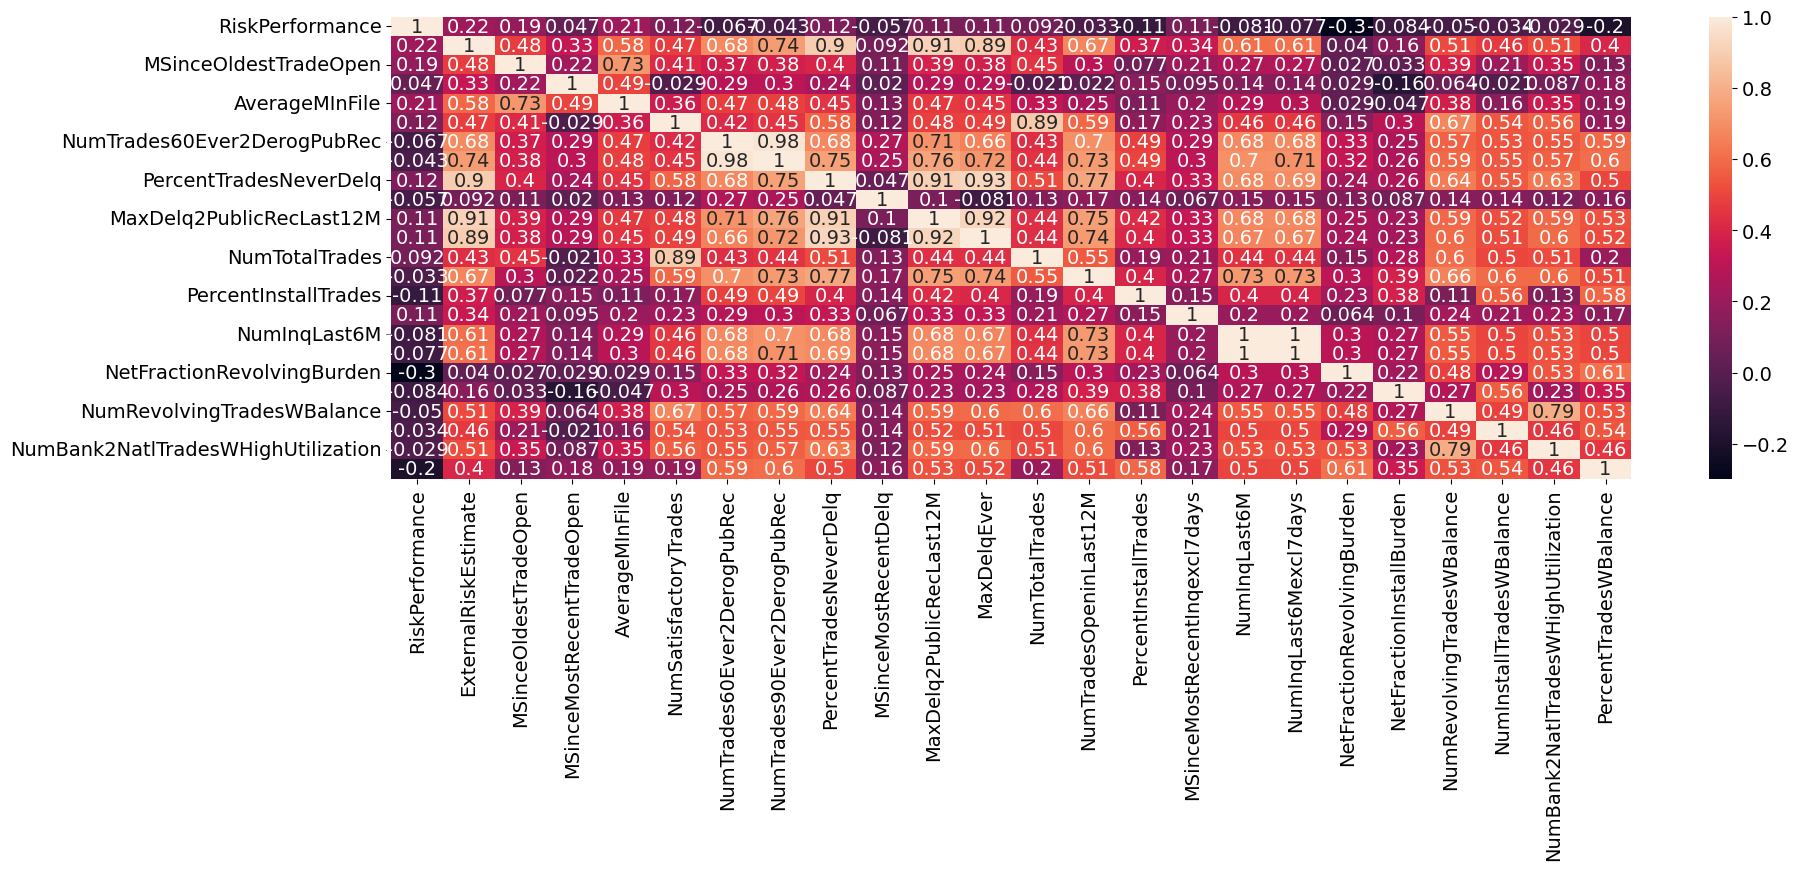

In [38]:
# Correlation matrix
corr = df.corr()

# Plotting Heatmap
plt.figure(figsize = (20,6))
sns.heatmap(corr, annot = True)

In [39]:
round(corr.iloc[0,1:].sort_values(ascending = False), 3)

ExternalRiskEstimate                  0.217
AverageMInFile                        0.209
MSinceOldestTradeOpen                 0.185
NumSatisfactoryTrades                 0.123
PercentTradesNeverDelq                0.122
MSinceMostRecentInqexcl7days          0.110
MaxDelq2PublicRecLast12M              0.110
MaxDelqEver                           0.107
NumTotalTrades                        0.092
MSinceMostRecentTradeOpen             0.047
NumBank2NatlTradesWHighUtilization   -0.029
NumTradesOpeninLast12M               -0.033
NumInstallTradesWBalance             -0.034
NumTrades90Ever2DerogPubRec          -0.043
NumRevolvingTradesWBalance           -0.050
MSinceMostRecentDelq                 -0.057
NumTrades60Ever2DerogPubRec          -0.067
NumInqLast6Mexcl7days                -0.077
NumInqLast6M                         -0.081
NetFractionInstallBurden             -0.084
PercentInstallTrades                 -0.112
PercentTradesWBalance                -0.199
NetFractionRevolvingBurden      

With the correlations of the features with our target value contained between -0.298 and 0.217, we can say that none of the features are strongly correlated with the risk performance of the clients.

### Modeling

Let's begin by importing the following tools from sklearn.

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
import time

In [41]:
X = df.drop('RiskPerformance', axis = 1)
y = df['RiskPerformance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify = y)

In [42]:
# Preprocess data
numeric_features = [column for column in X.columns]

numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers = [
    'num', numeric_transformer, numeric_features
])

Let's create a dataframe which will store the different scoring metrics used to evaluate the performances of our models.

In [43]:
metrics_for_models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'f1-score'], 
                       columns=['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Naive Bayes','LightGBM'])

In [44]:
metrics_for_models

,Dummy Model,Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,Naive Bayes,LightGBM
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1-score,NaN,NaN,NaN,NaN,NaN,NaN,NaN


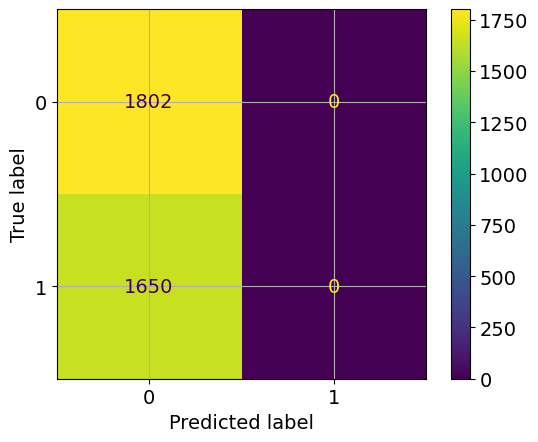

0.5220162224797219


In [45]:
# Dummy model
from sklearn.dummy import DummyClassifier
classifier_dm = DummyClassifier(strategy = "most_frequent", random_state = 0)

# fitting model to training data
classifier_dm.fit(X_train, y_train)
y_pred = classifier_dm.predict(X_test)

#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'Dummy Model'] = accuracy_score(y_pred=y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'Dummy Model'] = precision_score(y_pred=y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'Dummy Model'] = recall_score(y_pred=y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'Dummy Model'] = f1_score(y_pred=y_pred, y_true=y_test)

y_pred_prob = classifier_dm.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'Dummy Model'] = roc_auc_score(y_test, y_pred_prob)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = classifier_dm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=classifier_dm.classes_)
disp.plot()
plt.show()
print(accuracy_score(y_pred, y_test))

In [46]:
print('Training accuracy {:.4f}'.format(classifier_dm.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(classifier_dm.score(X_test,y_test)))

Training accuracy 0.5219
Testing accuracy 0.5220


In [47]:
y_train.value_counts(normalize=True)

0    0.521907
1    0.478093
Name: RiskPerformance, dtype: float64

The Dummy Classifier with the strategy parameter set equal to "most frequent" makes predictions based on which class has more data points. In this case, since 52% of the data points in the training set for the target value belongs to "Bad," the dummy classifier will predict every customer to be bad, which aligns with the proportion of "Bad" customers of 52%. This is a good baseline model for which we can compare the performances of our other models with. 

The next step is to develop the following models: Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,Naive Bayes, and LightGBM. For each model, we will either conduct a Grid Search or a Random Search to find the optimal parameters, then fit each according to their parameters. Next, we will retrieve the optimal threshold for which the model performs best and find their confusion matrix. Finally, we will evaluate each model according to their accuracy, recall, precision, f-1, and AUC scores. 

In [48]:
# standardize training and testing datasets
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-5, 8, 15),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [51]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
clf = GridSearchCV(logreg,
                  param_grid = parameters,
                  scoring = 'accuracy',
                  cv = 10)
clf.fit(X_train, y_train)
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.4393970560760795, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.7198508253515387


In [52]:
logreg = LogisticRegression(C = 0.4393970560760795,
                           penalty = 'l2',
                           solver = 'newton-cg',
                           random_state = 0)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("The accuracy score for the Logistic Regression model is {}.".format(accuracy_score(y_pred, y_test)))

The accuracy score for the Logistic Regression model is 0.7071263035921205.


In [53]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(C = 0.4393970560760795,
                           penalty = 'l2',
                           solver = 'newton-cg',
                           random_state = 0)
logreg.fit(X_train, y_train)

y_prob = logreg.predict_proba(X_test)[:, 1]

In [54]:
print('Training accuracy {:.4f}'.format(logreg.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(logreg.score(X_test,y_test)))

Training accuracy 0.7230
Testing accuracy 0.7071


AUC: 0.7780575454881782
Threshold: 0.00, TPR: 1.00, FPR: 1.00


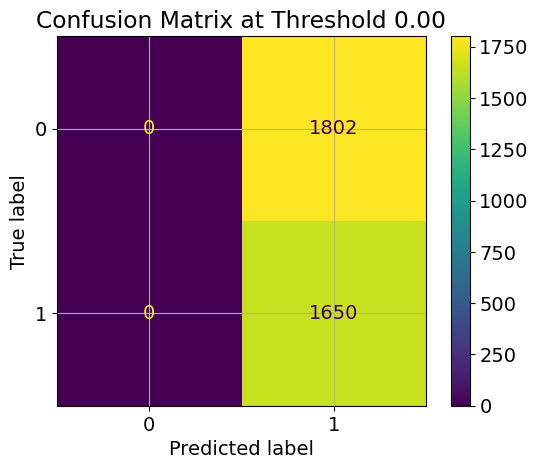

Threshold: 0.05, TPR: 1.00, FPR: 0.98


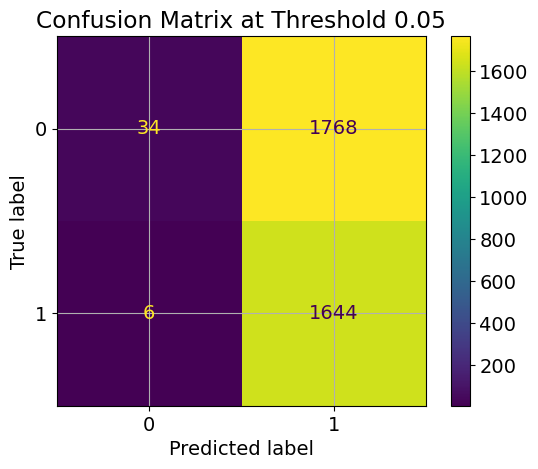

Threshold: 0.10, TPR: 0.99, FPR: 0.91


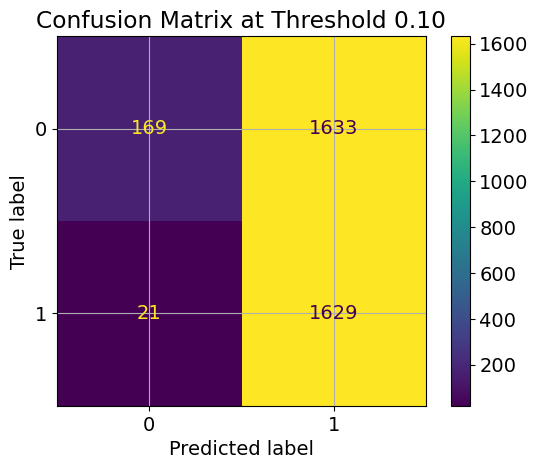

Threshold: 0.15, TPR: 0.98, FPR: 0.83


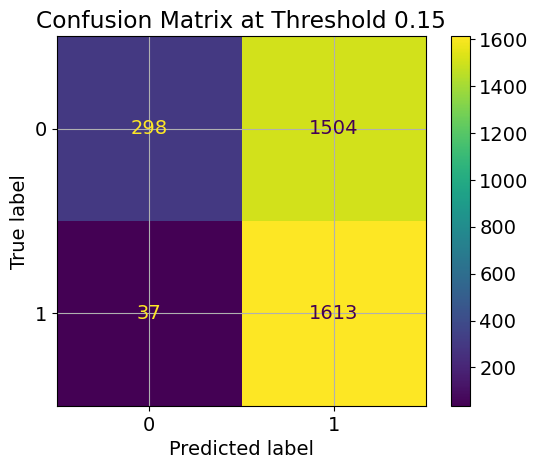

Threshold: 0.20, TPR: 0.96, FPR: 0.74


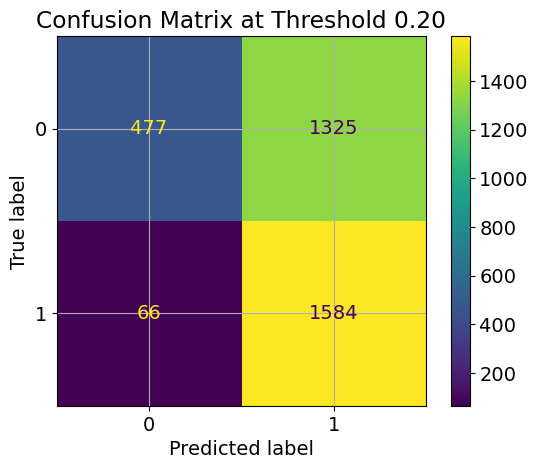

Threshold: 0.25, TPR: 0.93, FPR: 0.65


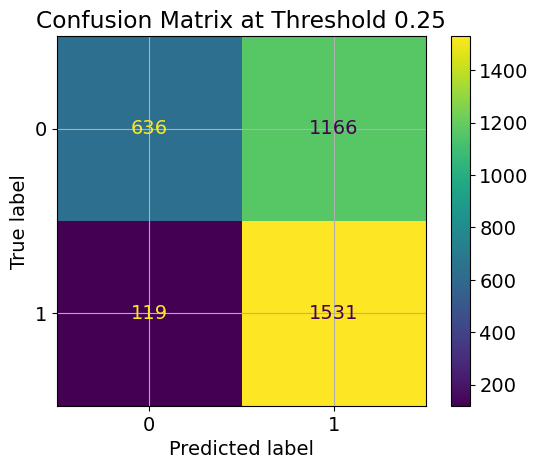

Threshold: 0.30, TPR: 0.89, FPR: 0.56


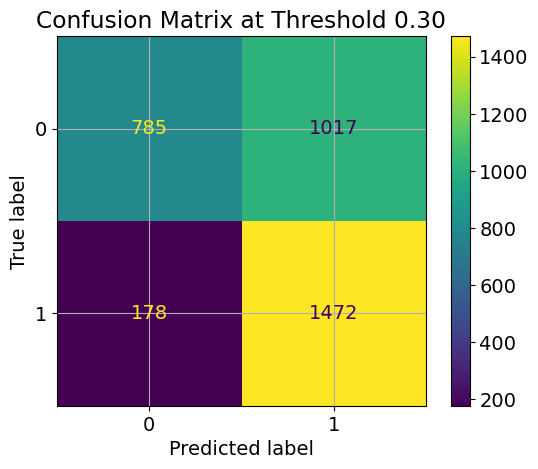

Threshold: 0.35, TPR: 0.86, FPR: 0.50


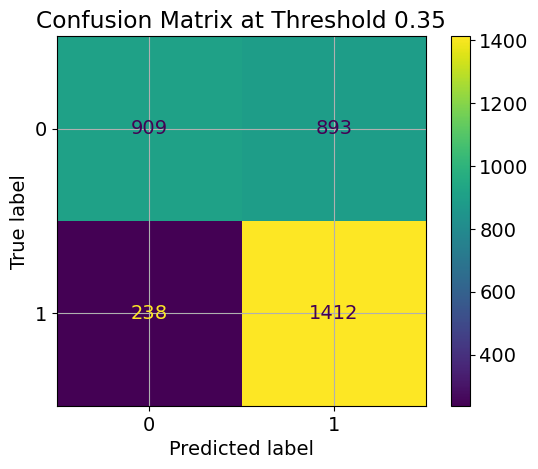

Threshold: 0.40, TPR: 0.82, FPR: 0.43


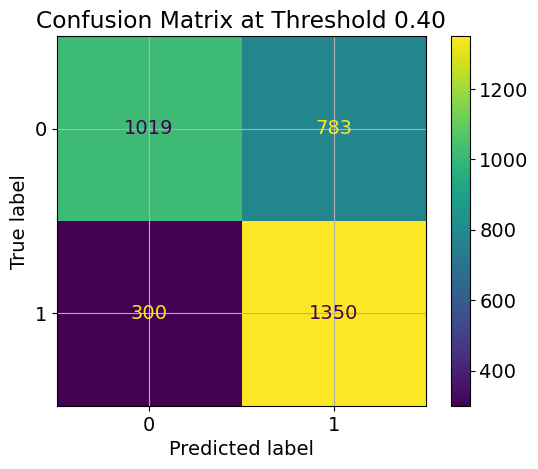

Threshold: 0.45, TPR: 0.72, FPR: 0.31


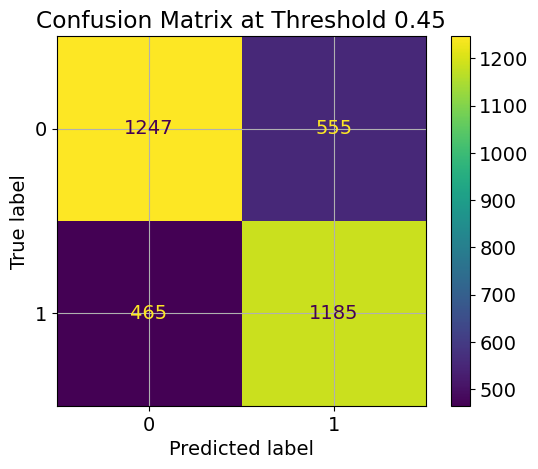

Threshold: 0.50, TPR: 0.67, FPR: 0.25


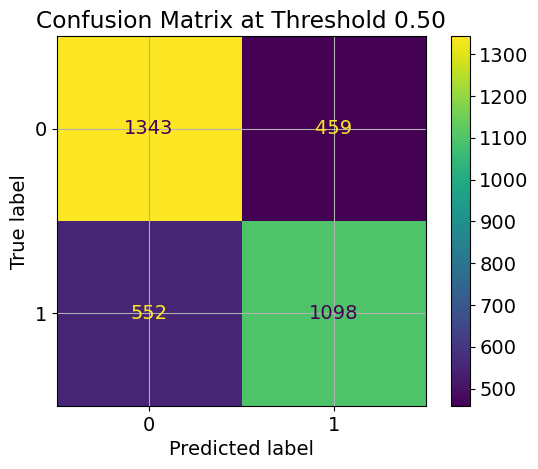

Threshold: 0.55, TPR: 0.62, FPR: 0.21


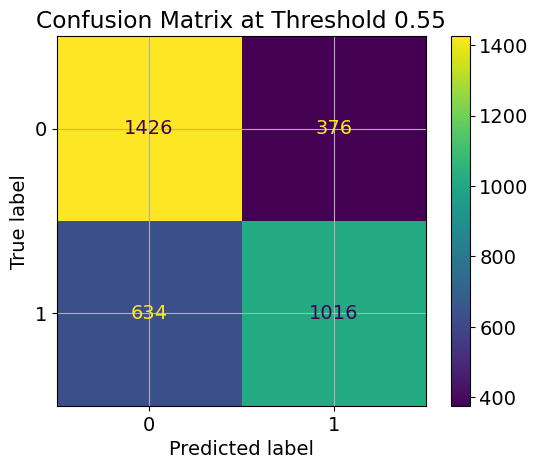

Threshold: 0.60, TPR: 0.55, FPR: 0.16


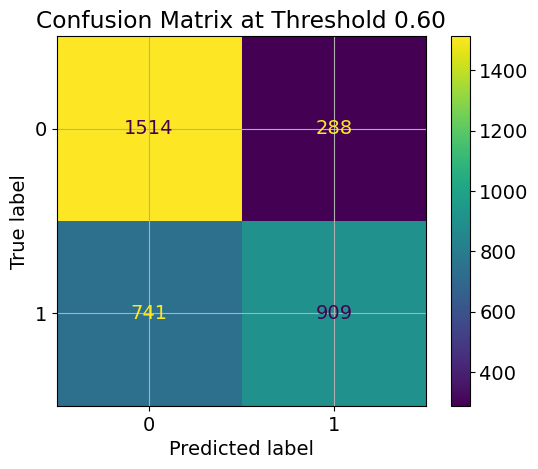

Threshold: 0.65, TPR: 0.49, FPR: 0.12


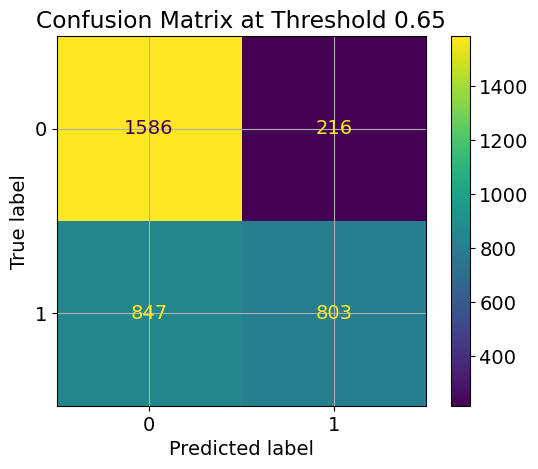

Threshold: 0.70, TPR: 0.40, FPR: 0.09


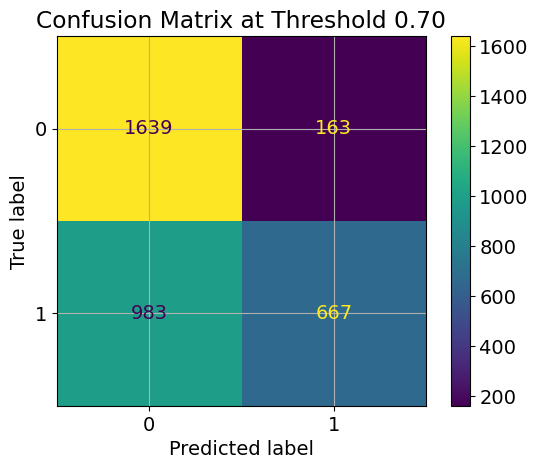

Threshold: 0.75, TPR: 0.31, FPR: 0.06


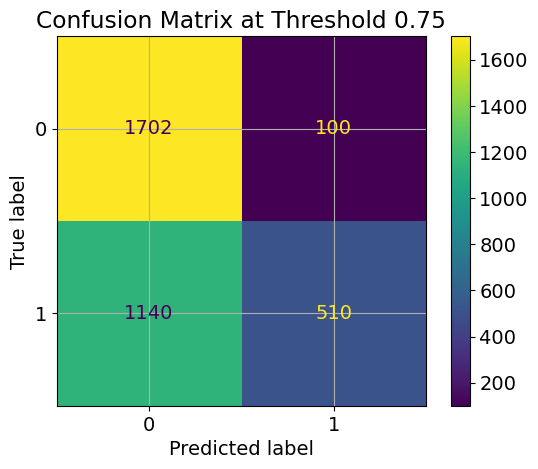

Threshold: 0.80, TPR: 0.19, FPR: 0.03


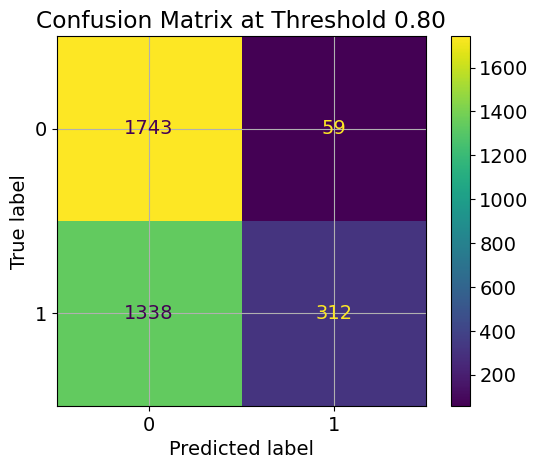

Threshold: 0.85, TPR: 0.10, FPR: 0.01


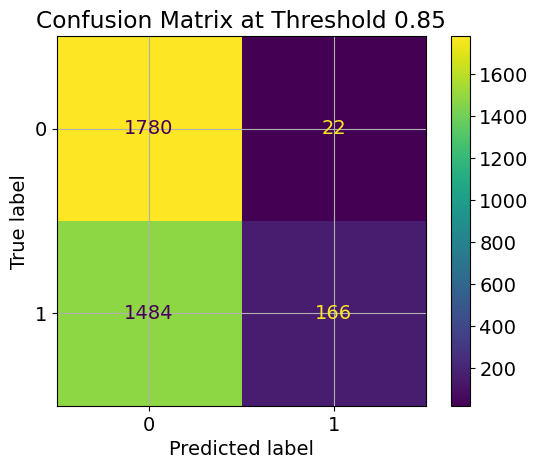

Threshold: 0.90, TPR: 0.03, FPR: 0.00


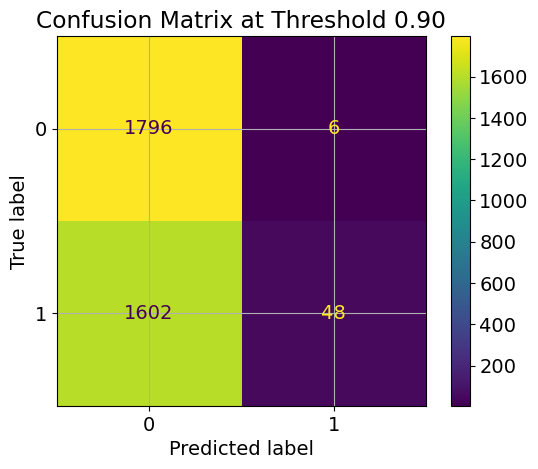

Threshold: 0.95, TPR: 0.00, FPR: 0.00


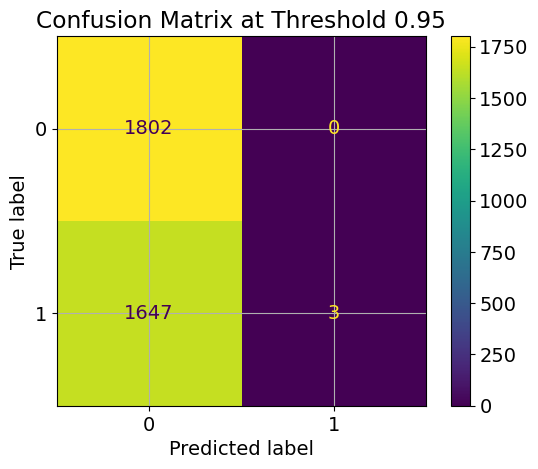

Threshold: 1.00, TPR: 0.00, FPR: 0.00


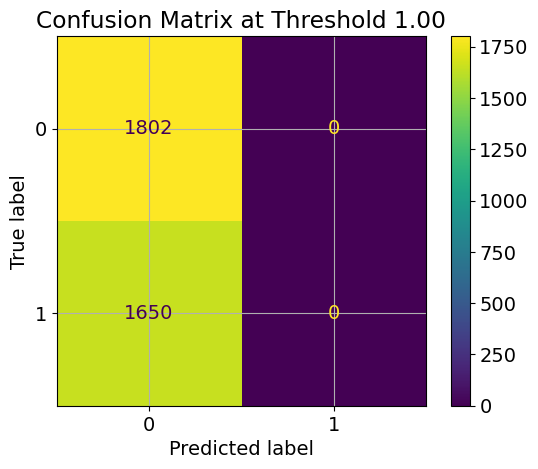

In [55]:
# Calculate TPR, FPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc}")

# Iterate over different thresholds
for thresh in np.arange(0, 1.05, 0.05):
    y_pred = (y_prob > thresh).astype(int)

    # TPR and FPR
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    print(f"Threshold: {thresh:.2f}, TPR: {tpr:.2f}, FPR: {fpr:.2f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix at Threshold {thresh:.2f}")
    plt.show()

Note that we can achieve better or worse results for accuracy, precision, and recall by varying the probability at which we classify customers as "good" and "bad." By default, the probability threshold is set at 50%, as this is the intuitive level for classification. To get a better understanding of the importance of the probability threshold, we need to define a few important terms. In a confusion matrix, entries on the main diagonal correspond to correct classifications, while other entries tell us how many samples of one class got mistakenly classified as another class. Correctly classified samples belonging to the positive class are called *true positives* and correctly classified samples belonging to the negative class are called *true negatives*. They are abbreviated TP and TN respectively. An incorrect positive prediction is called a *false positive* (that is, the sample is actually negative) and an incorrect negative prediction is called a *false negative* (that is, the sample is actually positive). These are abbreviated FP and FN respectively. 

*Precision* measures how many samples predicted as positive are actually positive. The formula is given by 

$$\frac{TP}{TP + FP}$$

*Recall*, on the other hand, measures how many of the positive samples are captured by the positive predictions, and is given by:

$$\frac{TP}{TP + FN}$$

Depending on whether it is more important to avoid false negatives by raising the recall score or to limit the number of false positives by raising the precision score can be done by changing the probability threshold. By weighing the costs of false negatives and false positives, we can then decide in which direction to change our threshold, which will then influence our recall and precision scores. Within the context of this project, a false negative would be classifying a "good" customer as "bad," that is, saying that a customer who has paid back their loan did not pay it. A false positive would be classifying a "bad" customer as "good," that is, that a customer who has not paid back their loan did pay it back. In this case, false positives would be more costly than false negatives, as the loan given to a customer who did not pay it back would be lost. Since we desire to limit the number of false positives, we should optimize for precision by raising the probability threshold. Raising the threshold implies that the model will classify negative samples incorrectly less often. This can be seen in the formula of precision as the smaller FP is, the smaller the denominator, which will then increase the precision score. 

Now we know that if we are to change the probability threshold at all, we should raise it as to limit the number of false positives. However, the higher we raise the precision score, the lower the recall score becomes. This is because fewer positive samples will be correctly classified as positive, therefore reducing recall. For example, suppose that a sample is positive and the probability that it will be classified as positive is 75%. If we set the probability threshold at 90%, then this positive sample will be classified as negative, even though it has a high probability of being positive. This is why we should carefully consider how much we alter the probability threshold according to the business problem at hand. Given this, we tested various thresholds and chose the threshold that yielded the highest model accuracy, while making sure that we did not choose a probability threshold that was too high. 

In [56]:
# Iterate over different thresholds
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

The threshold with the highest accuracy score is: 0.55


In [57]:
# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

In [58]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'Logistic Regression'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'Logistic Regression'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'Logistic Regression'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'Logistic Regression'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = logreg.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'Logistic Regression'] = roc_auc_score(y_test, y_pred_prob)

In [59]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

k_range=range(1,26)
scores=[]
knn_dict = {}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    x = accuracy_score(y_test, y_pred)
    scores.append(x)

In [60]:
# Retrieve number of neighbors with highest accuracy score
knn_dict = dict(zip(k_range, scores))
max(knn_dict, key = lambda x: knn_dict[x])

16

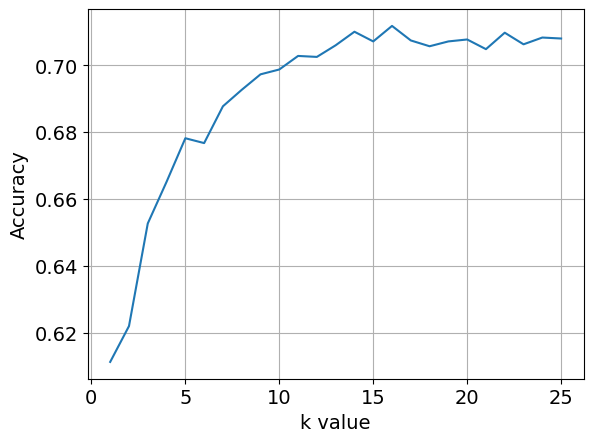

In [61]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

In [62]:
# knn (k=19)
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

In [63]:
print('Training accuracy {:.4f}'.format(knn.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(knn.score(X_test,y_test)))

Training accuracy 0.7231
Testing accuracy 0.7071


In [64]:
# Iterate over different thresholds
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

The threshold with the highest accuracy score is: 0.55


In [65]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'K Nearest Neighbors'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'K Nearest Neighbors'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'K Nearest Neighbors'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'K Nearest Neighbors'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = knn.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'K Nearest Neighbors'] = roc_auc_score(y_test, y_pred_prob)

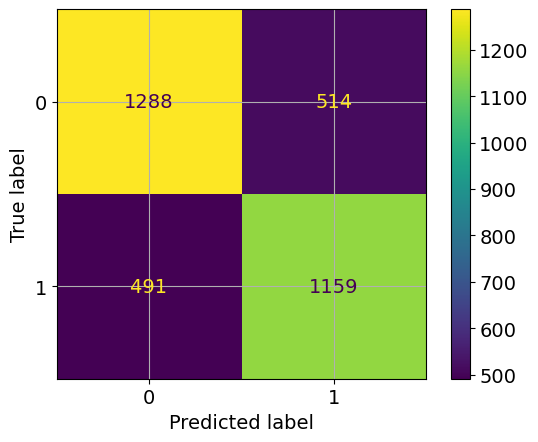

In [66]:
# plot confusion matrix
cm = confusion_matrix(y_test, optimal_y_pred, labels = knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [67]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
param_grid_dt = {
                "max_depth": [3, 10, 20, None],
                "max_features": randint(1, 9),
                "min_samples_leaf": randint(1, 9),
                "min_samples_split": randint(2, 9),
                "criterion": ["gini", "entropy"]
}
tree = DecisionTreeClassifier(random_state = 0)
tree_cv = RandomizedSearchCV(tree,
                        param_grid_dt,
                        cv = 10)
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 4}
Best score is 0.6923117994701447


In [68]:
tree = DecisionTreeClassifier(criterion = 'entropy', 
                              max_depth = 3, 
                              max_features = 7, 
                              min_samples_leaf = 7, 
                              min_samples_split = 8, 
                              random_state = 0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.6871378910776361


In [69]:
print('Training accuracy {:.4f}'.format(tree.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(tree.score(X_test,y_test)))

Training accuracy 0.6959
Testing accuracy 0.6871


In [70]:
# Iterate over different thresholds
y_prob = tree.predict_proba(X_test)[:, 1]
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

The threshold with the highest accuracy score is: 0.5


In [71]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'Decision Tree'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'Decision Tree'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'Decision Tree'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'Decision Tree'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = tree.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'Decision Tree'] = roc_auc_score(y_test, y_pred_prob)

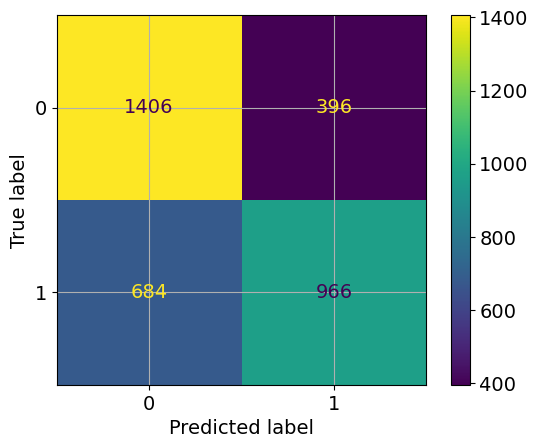

In [72]:
# plot confusion matrix
cm = confusion_matrix(y_test, optimal_y_pred, labels = tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=tree.classes_)
disp.plot()
plt.show()

In [73]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = { 
                 'n_estimators': [50, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 10, 20, None],
                 'min_samples_leaf': randint(1, 9),
                 'min_samples_split': randint(2, 9),
                 'max_features': randint(1, 9)
}
rf = RandomForestClassifier(random_state=0)
rf_cv = RandomizedSearchCV(rf,
                          param_grid_rf,
                          cv = 10)
rf_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 100}
Best score is 0.7201361320562463


In [74]:
rf = RandomForestClassifier(random_state = 0,
                           criterion = 'entropy',
                           max_depth = None,
                           max_features = 2,
                           min_samples_leaf = 5,
                           min_samples_split = 7,
                           n_estimators = 50)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7253765932792584


In [75]:
print('Training accuracy {:.4f}'.format(rf.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(rf.score(X_test,y_test)))

Training accuracy 0.8444
Testing accuracy 0.7254


In [76]:
# Iterate over different thresholds
y_prob = rf.predict_proba(X_test)[:, 1]
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

The threshold with the highest accuracy score is: 0.5


In [77]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'Random Forest'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'Random Forest'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'Random Forest'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'Random Forest'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = rf.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'Random Forest'] = roc_auc_score(y_test, y_pred_prob)

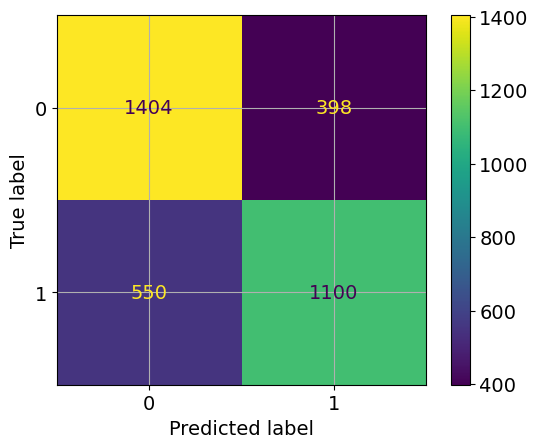

In [78]:
# plot confusion matrix
cm = confusion_matrix(y_test, optimal_y_pred, labels = rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [79]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred = classifier_nb.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.6674391657010429


In [80]:
print('Training accuracy {:.4f}'.format(classifier_nb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(classifier_nb.score(X_test,y_test)))

Training accuracy 0.6712
Testing accuracy 0.6674


In [81]:
# Iterate over different thresholds
y_prob = classifier_nb.predict_proba(X_test)[:, 1]
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

The threshold with the highest accuracy score is: 0.8


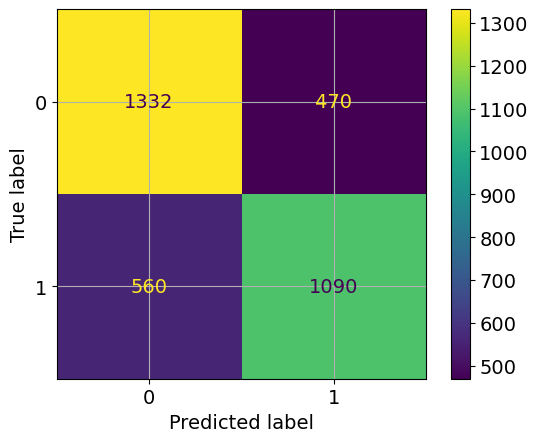

In [82]:
# plot confusion matrix
cm = confusion_matrix(y_test, optimal_y_pred, labels = classifier_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=classifier_nb.classes_)
disp.plot()
plt.show()

In [83]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'Naive Bayes'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'Naive Bayes'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'Naive Bayes'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'Naive Bayes'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = classifier_nb.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'Naive Bayes'] = roc_auc_score(y_test, y_pred_prob)

In [84]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 1)

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.716 (0.014)


In [85]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [86]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8443
Testing accuracy 0.7170


In [87]:
# Iterate over different thresholds
y_prob = model.predict_proba(X_test)[:, 1]
thresholds = []
accuracy_scores = []
y_predictions = []
for thresh in np.arange(0, 1.05, 0.05):
    thresholds.append(thresh)
    y_pred = (y_prob > thresh).astype(int)
    y_predictions.append(y_pred)
    accuracy_scores.append(accuracy_score(y_pred=y_pred, y_true=y_test))


threshold_vs_accuracy_score = dict(zip(thresholds, accuracy_scores))
# Returning threshold with highest accuracy score

optimal_threshold = max(threshold_vs_accuracy_score, key = lambda x: threshold_vs_accuracy_score[x])
print("The threshold with the highest accuracy score is: {}".format(optimal_threshold))

# Retrieve y predictions with optimal threshold
threshold_and_y_pred = dict(zip(thresholds, y_predictions))
optimal_y_pred = threshold_and_y_pred[optimal_threshold]

The threshold with the highest accuracy score is: 0.55


In [88]:
#update metrics_for_models dataframe
metrics_for_models.loc['accuracy', 'LightGBM'] = accuracy_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['precision', 'LightGBM'] = precision_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['recall', 'LightGBM'] = recall_score(y_pred=optimal_y_pred, y_true=y_test)
metrics_for_models.loc['f1-score', 'LightGBM'] = f1_score(y_pred=optimal_y_pred, y_true=y_test)

y_pred_prob = model.predict_proba(X_test)[:,1]
metrics_for_models.loc['AUC', 'LightGBM'] = roc_auc_score(y_test, y_pred_prob)

In [89]:
from pandas.plotting import table
actual_metrics = metrics_for_models.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC', 'f1-score']]*100
actual_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,Naive Bayes,LightGBM
accuracy,52.2,70.7,70.9,68.7,72.5,70.2,72.0
precision,0.0,73.0,69.3,70.9,73.4,69.9,74.1
recall,0.0,61.6,70.2,58.5,66.7,66.1,63.8
AUC,50.0,77.8,77.3,72.7,79.5,74.5,78.7
f1-score,0.0,66.8,69.8,64.1,69.9,67.9,68.6


By examining the above table, we see that the most accurate model is Random Forest, with an accuracy of 72.5%. However, we see that there are other models with comparable accuracy scores, namely LightGBM and Logistic Regression. How should we then decide which model to use in order to extract insight from the features? To answer this question, let's take a look at the ROC curve for some of the models in the table above. 

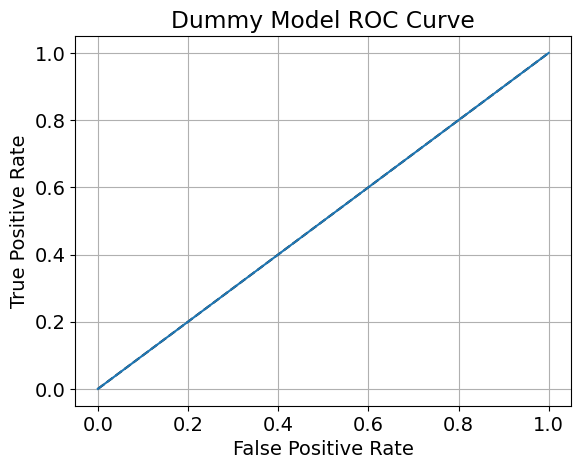

In [90]:
# ROC curve for dummy model
classifier_dm = DummyClassifier(strategy = "most_frequent", random_state = 0)

# fitting model to training data
classifier_dm.fit(X_train, y_train)
y_pred = classifier_dm.predict(X_test)
y_pred_prob = classifier_dm.predict_proba(X_test)[:,1]
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Dummy Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Dummy Model')
plt.show()

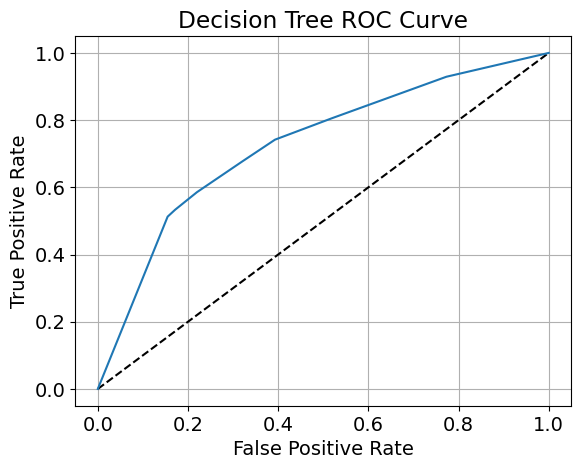

In [91]:
y_pred_prob = tree.predict_proba(X_test)[:,1]
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Decision Tree')
plt.show()

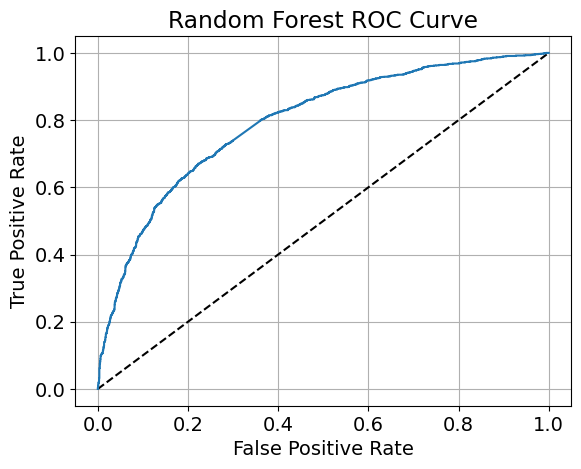

In [92]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Random Forest')
plt.show()

The ROC curve shows the *false positive rate* (FPR) against the *true positive rate*  (TPR). The true positive rate is just another name for recall, while the false positive rate is the fraction of false positives out of all negative samples:

$$FPR = \frac{FP}{FP + TN}$$

For the ROC curve, the ideal curve is close to the top left: we want a classifier that produces a *high recall* while keeping a *low false positive rate*. We can summarize the ROC curve using a single number, which is the area under the curve (AUC). The AUC is equivalent to the probability that a randomly picked point of the positive class will have a higher score according to the classifier than a randomly picked point from the negative class. AUC always returns a value between 0 (worst) and 1 (best). Essentially, the higher the AUC, the better the model is at distinguishing between the two classes. Predicting the points randomly always produces an AUC of 0.5, no matter how imbalanced the classes in the dataset are. We can see that with the AUC score for the Dummy Model in the table and how the area under the line in its ROC curve is exactly 0.5. For the decision tree model, its AUC score is higher, as the entire curve is above the dotted line. The model with the best AUC score is the Random Forest model. Since it has the best accuracy and AUC score, we will be using the Random Forest model to make our predictions. 

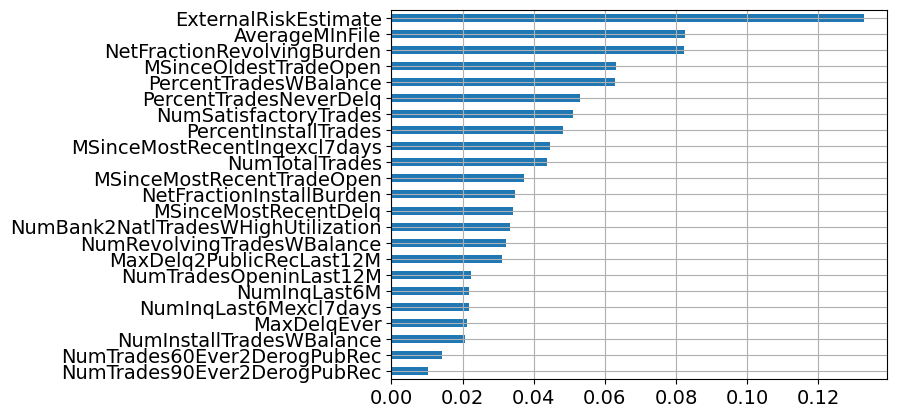

<Figure size 500x1000 with 0 Axes>

In [93]:
from matplotlib.pyplot import figure
feat_importances = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.figure(figsize=(5,10))
plt.show()

The three most important features are external risk estimate, net fraction involving burden, and average months in file. External risk estimate is by far the most important feature. This makes sense as the higher the risk estimate for a given client, the more likely that they will not pay back their loan in time. 

The second most important feature is net fraction involving burden, which is computed by the revolving balance divided by credit limit. To get a better idea of what exactly this feature means, let's take a look at a definition of revolving balance. Revolving credit, such as a credit card, allows a consumer to make purchases up to a certain spending limit and pay down the debt each month. As long as the spending cap has not been reached, the consumer can make purchases using the line of credit. The consumer does not have to pay off the total amount borrowed every month, but any balance that carries over month to month is the revolving balance. Therefore, the net fraction revolving feature is precisely what the revolving balance is divided by the credit limit. In essence, the higher the value is in this feature, the more likely it is that the client will not pay back their loan in time. This is because high revolving balances may indicate that a borrower is relying too much on credit. 

The third most important feature is the average number of months in file. In essence, the higher the average number of months the client is on file, the more likely they will not pay back their loan within two years, as those clients who do pay off their loans on time tend to do so earlier rather than later. 